In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/adwiz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/adwiz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/adwiz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_json('datasets/dataset.json')
df['labels'] = df.hasBadWords.apply(lambda x: "hasBadWords.True" if x == True else "hasBadWords.False")
# data['labels'] = df.hasBadWords.apply(lambda x: 1 if x == True else 0)
df.drop(['violation', 'hasBadWords'], axis=1, inplace=True)
# df['text'] = df['text'].apply(lambda x: str(x).split(' '))
df['text'] = df['text'].apply(lambda x: str(x))
# df.rename(columns={"text": "texts"}, inplace=True)
df['labels'] = df['labels'].astype('category')
print('dimension: ', df.shape)
df.head()

dimension:  (86439, 2)


,text,labels
0,My Favorite Slut,hasBadWords.False
1,girlfriends sit on each other's faces with the...,hasBadWords.False
2,bound beauty kisses her girlfriend,hasBadWords.False
3,MORGAN - Anytime - Nail Painting On The Slave'...,hasBadWords.False
4,TRANSGENDER COACHING (wmv) PART 1,hasBadWords.False


In [3]:
df['labels'].value_counts()

hasBadWords.False    83159
hasBadWords.True      3280
Name: labels, dtype: int64

In [4]:
import re
regex = re.compile('[\w|\d]+') #('[A-Za-z]+')

def words_only(text, regex=regex):
    return ' '.join(regex.findall(text))

df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

In [5]:
df.head()

,text,labels
0,my favorite slut,hasBadWords.False
1,girlfriends sit on each other s faces with the...,hasBadWords.False
2,bound beauty kisses her girlfriend,hasBadWords.False
3,morgan anytime nail painting on the slave s face,hasBadWords.False
4,transgender coaching wmv part 1,hasBadWords.False


In [6]:
df.text.iloc[0]

'my favorite slut'

In [7]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('english') + ['I', 'div' , 'p', 'center', 'tr', 'com',  '</tr>', 'The', 'http',
                                           'font', 'br', 'href', 'clips4sale', 'www', 'align', 'td', 
                                            'img', 'src', 'class', 'span', '0', 'nbsp', 'b', 'imagecdn',
                                           '_blank', 'color', 'target', 'width', 'https://', 'jpg', 'bottom_html',
                                           'bottom_text', 'style', 'text', 'link', 'https', 'images', 'size',
                                           'border', 'height', 'true ', 'return true', 'wmv', 'sans', 'window status',
                                           'arial', 'helvetica']
def remove_stopwords(text, mystopwords=mystopwords):
    try:
        return ' '.join([token for token in text.split() if not token in mystopwords])
    except:
        return ''

df.text = df.text.apply(remove_stopwords)
df.text

0                                            favorite slut
1                              girlfriends sit faces asses
2                           bound beauty kisses girlfriend
3                  morgan anytime nail painting slave face
4                              transgender coaching part 1
                               ...                        
86434    enought visit us social media sites updates ch...
86435                                                     
86436                                                     
86437                                                     
86438    accounts101 201343 snapshot 2022 05 18 15_45_3...
Name: text, Length: 86439, dtype: object

In [8]:
%%time
# Unworked shit
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return ''.join(m.lemmatize(text)).strip()
    except:
        return ' '

##### Alternative way

# import nltk

# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = nltk.stem.WordNetLemmatizer()

# def lemmatize(text):
#     return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df.text = df.text.apply(lemmatize)

CPU times: user 6.06 s, sys: 792 ms, total: 6.86 s
Wall time: 28.4 s


In [9]:
df.head()

,text,labels
0,favorite slut,hasBadWords.False
1,girlfriends sit faces asses,hasBadWords.False
2,bound beauty kisses girlfriend,hasBadWords.False
3,morgan anytime nail painting slave face,hasBadWords.False
4,transgender coaching part 1,hasBadWords.False


In [10]:
# mystoplemmas = ['font','br','href', 'clips4sale', 'www', 'td', 'align', 'class', 'span']
# def remove_stoplemmas(text, mystoplemmas=mystoplemmas):
#     try:
#         return ' '.join([token for token in text.split() if not token in mystoplemmas])
#     except:
#         return ''

In [11]:
df['labels'] = df['labels'].astype('category')
print('dimension: ', df.shape)
df.head()

dimension:  (86439, 2)


,text,labels
0,favorite slut,hasBadWords.False
1,girlfriends sit faces asses,hasBadWords.False
2,bound beauty kisses girlfriend,hasBadWords.False
3,morgan anytime nail painting slave face,hasBadWords.False
4,transgender coaching part 1,hasBadWords.False


In [12]:
label_mapping = df['labels'].cat.categories
df['labels'] = df['labels'].cat.codes
X = df['text']
y = df['labels']

In [13]:
test_size = 0.2
random_state = 1234

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y)

In [14]:
from nltk import FreqDist

lemmata = []
for index, row in df.iterrows():
    lemmata  += row['text'].split()
fd = FreqDist(lemmata)
for i in fd.most_common(10):
    print(i)

('fetish', 26720)
('feet', 21387)
('foot', 19902)
('store', 17177)
('strong', 17044)
('ass', 13517)
('big', 13420)
('face', 11787)
('domination', 10533)
('clip', 10509)


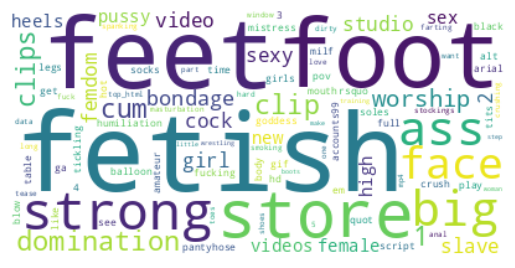

In [15]:
from wordcloud import *
word_freq = [i for i in fd.most_common(100)]
wd = WordCloud(background_color='white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [16]:
tokens_by_topic = []
for topic in df['labels'].unique():
    tokens = []
    sample = df[df['labels'] == topic]
    for i in range(len(sample)):
        tokens += sample.text.iloc[i].split()
    tokens_by_topic.append(tokens)

In [17]:
df['labels'].unique()

array([0, 1], dtype=int8)

In [18]:
event_id = 1
df['labels'].unique()[event_id]

1

In [19]:
%%time
import nltk
from nltk import *
N_best = 100 # число извлекаемых биграмм

bigram_mesures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграмм
finder = BigramCollocationFinder.from_words(tokens_by_topic[event_id]) # класс для хранения и извлечение биграм
finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже 3 раз
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_mesures.raw_freq, N_best)] # выбираем топ 10 биграм по частоте
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_mesures.student_t, N_best)] # выбираем топ 10 биграм по категориям
pmi_ranking = [' '.join(i) for i in finder.nbest(bigram_mesures.pmi, N_best)]
llr_ranking = [' '.join(i) for i in finder.nbest(bigram_mesures.likelihood_ratio, N_best)]
chi2_ranking = [' '.join(i) for i in finder.nbest(bigram_mesures.chi_sq, N_best)]

CPU times: user 1.55 s, sys: 12.6 ms, total: 1.57 s
Wall time: 1.61 s


In [20]:
rankings = pd.DataFrame({'chi2': chi2_ranking, 'llr': llr_ranking, 't-score': tscore_ranking, 'pmi': pmi_ranking, 'raw': raw_freq_ranking})
rankings = rankings[['raw', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(10)

,raw,pmi,t-score,chi2,llr
0,window status,12414 20808,window status,0161 0162,window status
1,return true,12502 12479,return true,11cf 96b8,return true
2,foot fetish,20and 20posts,foot fetish,11d3 b153,sans serif
3,blow bubble,36015 34101,blow bubble,12414 20808,pedal pumping
4,high heels,6244 fiona3bx,high heels,12429 12400,helvetica sans
5,face arial,754 209,face arial,12439 12438,arial helvetica
6,pedal pumping,7665 j4j,pedal pumping,124538804310 promocode,high heels
7,sans serif,8081 newgsbanner_468x60_5,sans serif,12502 12479,onmouseover window
8,arial helvetica,8boll tausta,arial helvetica,152187 veggiebabyy,onmouseout window
9,onmouseover window,_id b2bkvids,onmouseover window,188173 cocky,true onmouseout


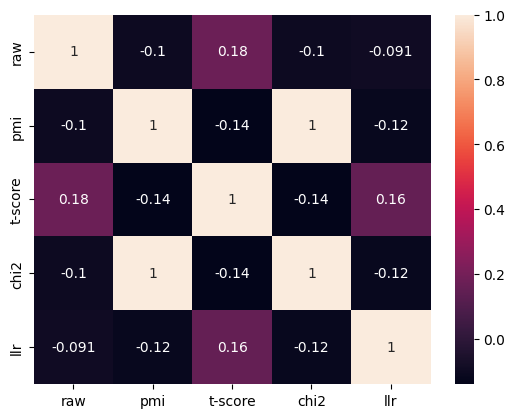

In [21]:
from scipy.stats import spearmanr
import seaborn as sns
%matplotlib inline

corr = spearmanr(rankings).correlation
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings));

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

xgb = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7, 
                    n_estimators=300)
tfidf = TfidfVectorizer(stop_words='english', analyzer=lambda x: x)
logistic = LogisticRegression(solver='liblinear', multi_class='auto')

tfidf_logistic = Pipeline([
    ('tfidf', tfidf), 
    ('logistic', logistic)
])

In [38]:
from scipy.stats import randint, uniform

# tfidf_params = {'tfidf__ngram_range': [(1, 1), (1, 2)]}
tfidf_params = {'tfidf__ngram_range': [(1, 1), (1, 3)]}
logistic_params = {'logistic__C': [0.5, 1.0, 1.5]}


tfidf_logistic_params = {**tfidf_params, **logistic_params}

In [51]:
from sklearn.model_selection import RandomizedSearchCV

cv = 5
n_iter = 3
random_state = 1234
scoring = 'roc_auc'

all_models = [
    ('tfidf_logistic', tfidf_logistic, tfidf_logistic_params)
]

all_models_info = []
for name, model, params in all_models:
    print('training:', name)
    model_tuned = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        cv=cv,
        n_iter=n_iter,
        n_jobs=-1,
        verbose=1,
        scoring=scoring,
        random_state=random_state,
        return_train_score=False
    ).fit(X_train, y_train)
    
    y_test_pred = model_tuned.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    info = name, model_tuned.best_score_, test_score, model_tuned
    all_models_info.append(info)

columns = ['model_name', 'train_score', 'test_score', 'estimator']
results = pd.DataFrame(all_models_info, columns=columns)
results = (results
           .sort_values('test_score', ascending=False)
           .reset_index(drop=True))
results

training: tfidf_logistic
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:544: UserWarning

,model_name,train_score,test_score,estimator
0,tfidf_logistic,0.825785,0.962055,"RandomizedSearchCV(cv=3,\n e..."


In [44]:
print(results.estimator.to_string())

0    RandomizedSearchCV(cv=3,\n                   e...


In [48]:
from sklearn.metrics import get_scorer_names

In [49]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
# label_mapping = data['labels'].cat.categories
# data['labels'] = data['labels'].cat.codes
# X = data['texts']
# y = data['labels']

In [ ]:
test_size = 0.2
random_state = 1234

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y)

# val_size = 0.1
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=val_size, random_state=random_state, stratify=y_train)